# Blockchain Data Extraction & Analysis
This notebook fetches blockchain data using HyperSync, saves it in Parquet format, and analyzes the data.

In [ ]:
%pip install pandas matplotlib

In [ ]:
import os
import pandas as pd

# Get the current working directory
print("Current working directory:", os.getcwd())

# Get the project root directory (going up one level from notebook directory)
project_root = os.path.dirname(os.getcwd())
data_dir = os.path.join(project_root, "data")

print("\nProject root:", project_root)
print("Data directory:", data_dir)

# List all files in the data directory using absolute path
print("\nFiles in data directory:")
try:
    print(os.listdir(data_dir))
    
    # Read JSON file
    json_file = os.path.join(data_dir, "transactions.json")
    parquet_file = os.path.join(data_dir, "transactions.parquet")
    df_json = pd.read_json(json_file)
    print(f"\nSuccessfully read {json_file}")
    print("JSON data shape:", df_json.shape)
    
    df = pd.read_parquet(parquet_file)

    # Display first few rows
    print(df.head())
    
except Exception as e:
    print(f"Error reading files: {str(e)}")

In [ ]:
# List of columns that are in hex format
hex_columns = [
    "gas", "gas_price", "max_priority_fee_per_gas", "max_fee_per_gas",
    "cumulative_gas_used", "effective_gas_price", "gas_used", "nonce"
]

# Convert hex to integer (ignoring null values)
for col in hex_columns:
    df[col] = df[col].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith("0x") else x)

# Convert transaction_index & block_number to integers if they aren't already
df["transaction_index"] = df["transaction_index"].astype(int)
df["block_number"] = df["block_number"].astype(int)

# Re-check data types
print(df.dtypes)


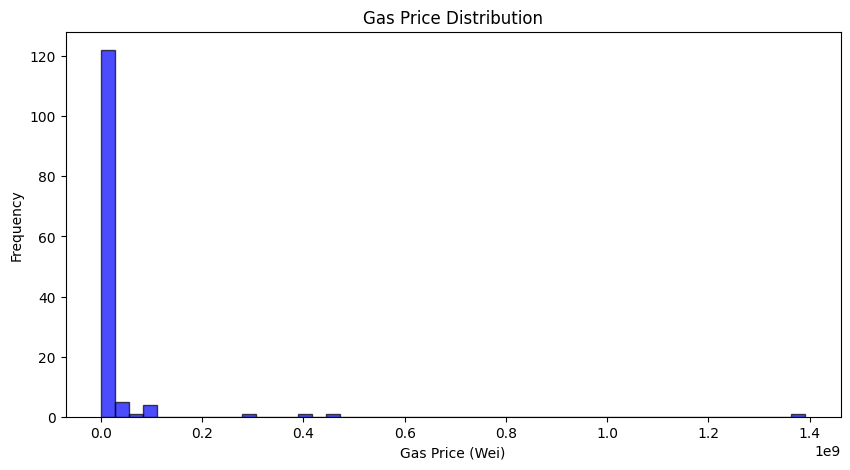

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["gas_price"], bins=50, alpha=0.7, color="blue", edgecolor="black")
plt.xlabel("Gas Price (Wei)")
plt.ylabel("Frequency")
plt.title("Gas Price Distribution")
plt.show()

# Histogram of Gas Prices


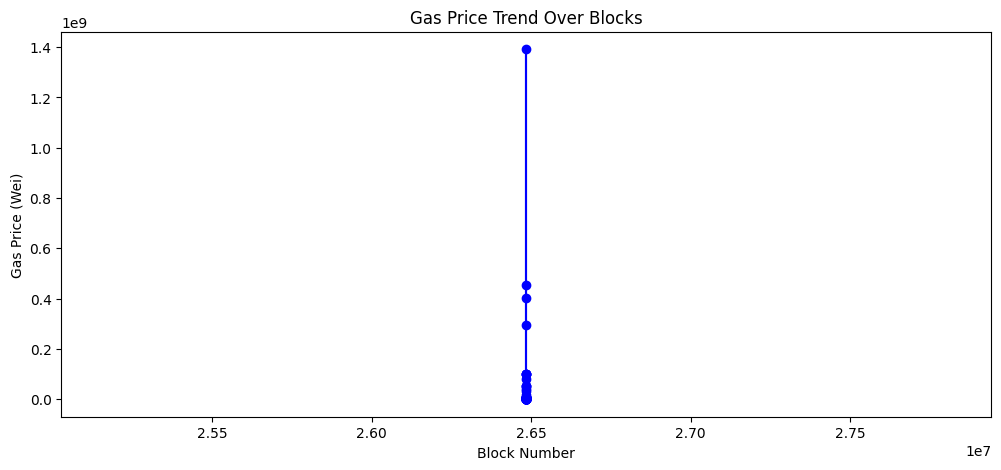

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(df["block_number"], df["gas_price"], marker="o", linestyle="-", color="blue")
plt.xlabel("Block Number")
plt.ylabel("Gas Price (Wei)")
plt.title("Gas Price Trend Over Blocks")
plt.show()


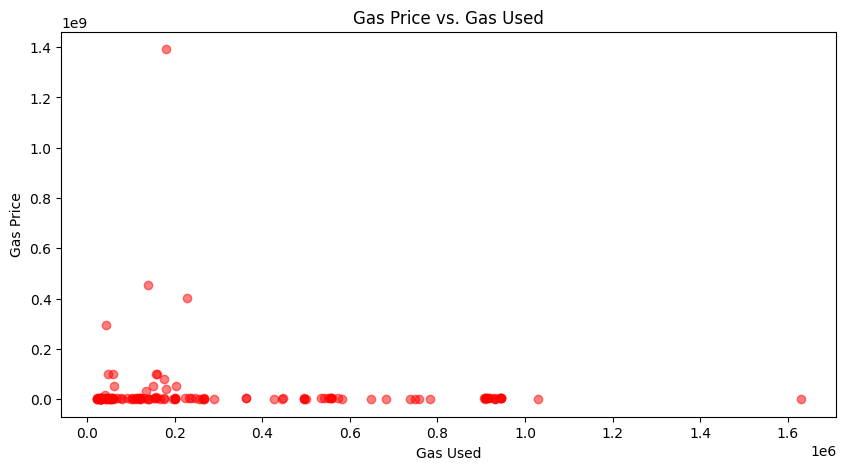

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(df["gas_used"], df["gas_price"], alpha=0.5, color="red")
plt.xlabel("Gas Used")
plt.ylabel("Gas Price")
plt.title("Gas Price vs. Gas Used")
plt.show()


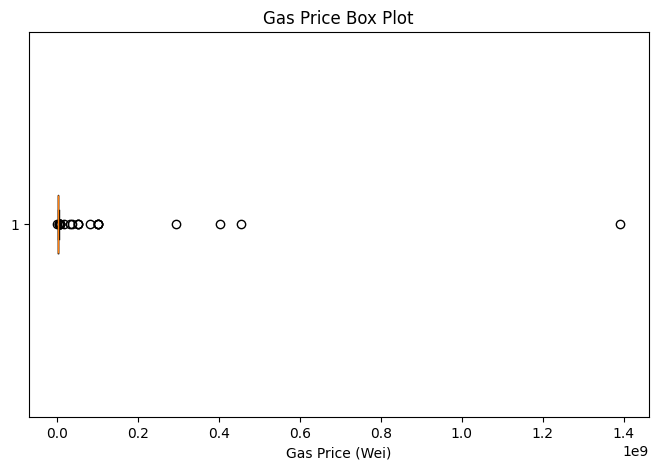

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot(df["gas_price"], vert=False)
plt.xlabel("Gas Price (Wei)")
plt.title("Gas Price Box Plot")
plt.show()
